## E-76 Obligated Federal Funds Data Analysis

E-76 Obligated Federal Funds Data Exploration
From the Division of Local Assistance
E-76's or "Authorizations to Proceed" is a federal authorization of funds to establish the reimbursement date for a phase of work

#### Question
- What types of projects are being funded?
- Is there a type of funding that is more likely to be approved?
- What is the most/least common type of funding

#### Data Sources:¶
* [Waiting dataset](https://dot.ca.gov/programs/local-assistance/reports/e-76-waiting)
* [Obligated dataset](https://dot.ca.gov/programs/local-assistance/reports/e-76-obligated)

In this notebook, we will conduct analysis to determine what types of projects are funded through DLA

In [1]:
import pandas as pd
from siuba import *

import numpy as np
from sqlalchemy import create_engine
from siuba.sql import LazyTbl
import altair as alt

from dla_utils import _dla_utils

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enab

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [3]:
df = pd.read_csv('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/clean_obligated_waiting.csv', low_memory=False)


In [4]:
df.head()

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True
1,1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,8,False
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
3,3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True


In [5]:
df.duplicated().sum()

0

In [6]:
df.sample(5)

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
18709,19032,Obligated,ER,32L0(300),Humboldt County,2021-04-02,2021-04-27,2021-04-28,2021-04-28,2021-05-19,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,67.00,1.00,21.00,NaN,Alderpoint Road Pm. 23.75,Repair Storm Water Debris Damage To Culvert An...,4,2021-02-19,2021-02-19,NON-MPO,NaN,32L0,300,False
9217,9259,Obligated,HSIP,5403(022),Carson,2015-05-12,2015-05-12,2015-05-12,2015-05-12,2015-05-13,49331.50,0.00,0.00,Authorized,NaN,7,E-76 approved on E-76 approved on,0.00,0.00,1.00,SCAG015,Intersection Of Avalon Blvd And Carson St. In ...,"Construct Two Right Turn Lanes,modigy Traffic ...",3,NaN,NaN,SCAG,NaN,5403,22,False
1163,1163,Obligated,HSIP,5012(113),Oakland,2018-06-26,2018-06-26,2018-06-26,2018-06-26,2018-07-02,-1.00,0.00,0.00,Authorized,5012,4,E-76 approved on,NaN,0.00,6.00,VAR110007,"Hegenberger Road @ Edes Ave, Baldwin St, Hamil...",Upgrade Traffic Signals & Install Flashing Bea...,4,NaN,NaN,MTC,NaN,5012,113,True
6877,6911,Obligated,BRLO,5917(097),Nevada County,2016-04-20,2016-04-20,2016-04-26,2016-04-28,2016-05-04,267740.00,0.00,267740.00,Authorized,5917,3,E-76 approved on Prepared on 10/6/2015,0.00,8.00,6.00,HBPLOCAL,Hirschdale Road At Uprr Crossing,Bridge Rehabilitation (tc),1,NaN,NaN,NON-MPO,NaN,5917,97,True
11788,11830,Obligated,BHLS,5166(015),Larkspur,2014-05-01,2014-05-01,2014-05-19,2014-05-28,2014-05-30,406800.00,0.00,508500.00,Authorized,5166,4,E-76 approved on E-76 approved on,0.00,27.00,2.00,VAR11045,Bon Air Bridge Rehabilitation,Rehab. Bridge Piles & Structur,7,NaN,NaN,MTC,NaN,5166,15,True


In [7]:
df.mpo.unique()

array(['NON-MPO', 'SACOG', 'MTC', 'TCAG', 'KCOG', 'CFCG', 'SCAG', 'BCAG',
       'SLAC', 'STANCOG', 'SJCG', 'SDAG', 'KCAG', 'SBCG', 'MCAG', 'TMPO',
       'AMBAG', 'MCTC', 'STPA', 'COFCG', 'FCOG', 'ER NONE', 'SHASTA',
       'MNOLTC', 'SJCOG', 'STACOG', 'STNCOG', 'FSTIP', 'SANDAG', 'SANDA',
       'SLOCOG', nan], dtype=object)

## Prefix Dive
Many duplicates in the prefix column, cleanded and condensed the visible ones in the cleaning notebook but will need further cleanups and confirmations for the prefix codes that are grouped together. 

In [8]:
df.prefix.nunique()

335

In [9]:
print(sorted(df['prefix'].unique()))

['6140000', 'ACNHPI', 'ACST-ER', 'ACSTP', 'ASCTP', 'ATCMTD', 'ATF5512', 'ATP', 'ATPCML', 'ATPHIPL', 'ATPHSIP', 'ATPLN', 'ATPLNI', 'ATPLSB1', 'ATPNIL', 'ATPSB1', 'ATPSB1L', 'ATPSTC', 'ATPSTCML', 'ATPSTPL', 'BDGL', 'BGFL', 'BHL', 'BHLO', 'BHLOZ', 'BHLOZD', 'BHLS', 'BHLSCR', 'BHLSP', 'BHLSZ', 'BHLSZD', 'BPMPL', 'BR', 'BR-NBISL', 'BRCMLO', 'BRHIPL', 'BRIM', 'BRL', 'BRLKS', 'BRLNS', 'BRLO', 'BRLOZ', 'BRLOZA', 'BRLOZB', 'BRLOZE', 'BRLRT', 'BRLS', 'BRLSN', 'BRLSZ', 'BRLSZA', 'BRLSZD', 'BRLZ', 'BRNBIF', 'BRNBISL', 'BROS', 'BUILDL', 'CASB', 'CFLBRLO', 'CMAQL', 'CMESPL', 'CMFERP', 'CMFERP16', 'CMHIPL', 'CMHPLU', 'CMHPLULN', 'CMHRL', 'CMHSIPL', 'CML', 'CMLFSP', 'CMLFSP18', 'CMLFTA', 'CMLG', 'CMLGNI', 'CMLHPL', 'CMLN', 'CMLNGI', 'CMLNI', 'CMLSBCG', 'CMLSTBGL', 'CMRPSTPL', 'CMSTPL', 'CMSTPLN', 'CMSTPLNI', 'CMTCIFL', 'CMTCIFLN', 'CMTLSP', 'CRDL', 'CRP', 'CRRSAA', 'DBF', 'DBPL02', 'DE', 'DEM', 'DEM04L', 'DEM05', 'DEM05L', 'DEM05LN', 'DEM05U', 'DEM05UBL', 'DEM06', 'DEM06L', 'DEM06U', 'DEM06UBL', 'DEM0

In [10]:
df.prefix.value_counts()

HSIP       3318
CML        3293
STP        2786
ER         1590
BRLO       1402
           ... 
DEM05LN       1
BRLNS         1
SR2SCML       1
STPE          1
FTACRRS       1
Name: prefix, Length: 335, dtype: int64

Made a slight dent, will need more cleaning

In [11]:
df.prefix.value_counts().sort_index(ascending=True)

6140000       2
ACNHPI        2
ACST-ER     230
ACSTP       316
ASCTP         1
           ... 
USFSSTPL      2
VPPL         19
VPPP          8
VPPTCS        1
WZDXL20       1
Name: prefix, Length: 335, dtype: int64

### How do funds look when we groupby Project type 


In [12]:
#using siuba to group
df_grouped = (df
  >> group_by(_.prefix)
  >> summarize(averge_funds = _.total_requested.mean())
  )


In [13]:
df_grouped.head()

,prefix,averge_funds
0,6140000,645621.50
1,ACNHPI,14713175.00
2,ACST-ER,498849.01
3,ACSTP,336444.14
4,ASCTP,15000.00


In [14]:
#adding count row
df_grouped >> count(_.prefix)

,prefix,n
0,6140000,1
1,ACNHPI,1
2,ACST-ER,1
3,ACSTP,1
4,ASCTP,1
...,...,...
330,USFSSTPL,1
331,VPPL,1
332,VPPP,1
333,VPPTCS,1


In [15]:
df_grouped.head()

,prefix,averge_funds
0,6140000,645621.50
1,ACNHPI,14713175.00
2,ACST-ER,498849.01
3,ACSTP,336444.14
4,ASCTP,15000.00


In [16]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prefix        335 non-null    object 
 1   averge_funds  335 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


#### Queries with Siuba

In [17]:
df >> group_by(_.prefix)

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True
1,1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,8,False
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
3,3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20112,20441,DISTRICT,FTACRRS,6000(069),Bay Area Rt,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,prog code,6000,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Bart Fare Collection Equipment,1,NaN,NaN,MTC,NaN,6000,69,True
20113,20442,DISTRICT,FTASTPL,6343(006),Mctd,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,prog code,6343,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Bus Stops Improvement,1,NaN,NaN,MTC,NaN,6343,6,True
20114,20443,DISTRICT,FTASTPL,6264(091),Vta,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,prog code,6264,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Electronic Locker Upgrade And Replacement,1,NaN,NaN,MTC,NaN,6264,91,True
20115,20444,DISTRICT,FTASTPL,6002(030),Ala-Con Costa T,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,prog code,6002,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Quick Builds And Tempo Lane Delineation,1,NaN,NaN,MTC,NaN,6002,30,True


#### Subsetting the data using GroupBy

In [18]:
#trying another approach

In [19]:
prefix_mean= df.groupby("prefix")[["fed_requested", "ac_requested", "total_requested", "dist_processing_days","hq_processing_days","fhwa_processing_days"]].mean()



In [20]:
prefix_mean.head()

,fed_requested,ac_requested,total_requested,dist_processing_days,hq_processing_days,fhwa_processing_days
prefix,,,,,,
6140000,500000.00,0.00,645621.50,0.00,7.00,3.50
ACNHPI,0.00,14611175.00,14713175.00,24.00,121.00,20.00
ACST-ER,38959.07,381719.73,498849.01,18.73,39.63,4.90
ACSTP,7981.90,286643.79,336444.14,39.91,35.26,5.78
ASCTP,0.00,13279.00,15000.00,1.00,43.00,7.00


In [21]:
#grouping again to get the median
prefix_median= df.groupby("prefix")[["fed_requested", "ac_requested", "total_requested", "dist_processing_days","hq_processing_days","fhwa_processing_days"]].median()


In [22]:
prefix_mean.head()

,fed_requested,ac_requested,total_requested,dist_processing_days,hq_processing_days,fhwa_processing_days
prefix,,,,,,
6140000,500000.00,0.00,645621.50,0.00,7.00,3.50
ACNHPI,0.00,14611175.00,14713175.00,24.00,121.00,20.00
ACST-ER,38959.07,381719.73,498849.01,18.73,39.63,4.90
ACSTP,7981.90,286643.79,336444.14,39.91,35.26,5.78
ASCTP,0.00,13279.00,15000.00,1.00,43.00,7.00


In [23]:
prefix_mean['count'] = df.prefix.value_counts()

In [24]:
prefix_mean.head()

,fed_requested,ac_requested,total_requested,dist_processing_days,hq_processing_days,fhwa_processing_days,count
prefix,,,,,,,
6140000,500000.00,0.00,645621.50,0.00,7.00,3.50,2
ACNHPI,0.00,14611175.00,14713175.00,24.00,121.00,20.00,2
ACST-ER,38959.07,381719.73,498849.01,18.73,39.63,4.90,230
ACSTP,7981.90,286643.79,336444.14,39.91,35.26,5.78,316
ASCTP,0.00,13279.00,15000.00,1.00,43.00,7.00,1


In [25]:
#making sure the counts went to the right rows. looks like they did
df.prefix.value_counts().sort_index(ascending=True)

6140000       2
ACNHPI        2
ACST-ER     230
ACSTP       316
ASCTP         1
           ... 
USFSSTPL      2
VPPL         19
VPPP          8
VPPTCS        1
WZDXL20       1
Name: prefix, Length: 335, dtype: int64

In [26]:
#now add to the median dataframe
prefix_median['count'] = df.prefix.value_counts()

In [27]:
#check
prefix_median.head()

,fed_requested,ac_requested,total_requested,dist_processing_days,hq_processing_days,fhwa_processing_days,count
prefix,,,,,,,
6140000,500000.00,0.00,645621.50,0.00,7.00,3.50,2
ACNHPI,0.00,14611175.00,14713175.00,24.00,121.00,20.00,2
ACST-ER,0.00,142599.25,179418.00,6.00,24.00,4.00,230
ACSTP,0.00,79723.50,87560.21,9.00,26.00,5.00,316
ASCTP,0.00,13279.00,15000.00,1.00,43.00,7.00,1


In [28]:
prefix_mean_subset = prefix_mean.loc[prefix_mean['count'] >= 50]

In [29]:
prefix_mean_subset

,fed_requested,ac_requested,total_requested,dist_processing_days,hq_processing_days,fhwa_processing_days,count
prefix,,,,,,,
ACST-ER,38959.07,381719.73,498849.01,18.73,39.63,4.90,230
ACSTP,7981.90,286643.79,336444.14,39.91,35.26,5.78,316
ATP,668764.02,1491.19,972328.68,23.39,11.78,6.69,587
ATPCML,560399.96,35223.22,878034.09,19.46,17.75,6.39,63
BHLO,310074.19,0.00,390864.80,37.83,6.67,5.75,92
BHLS,1396001.85,479371.70,2420565.72,35.93,11.03,5.94,261
BPMPL,135969.50,24319.37,179332.52,33.77,9.80,5.83,579
BR,740481.64,488739.88,1434534.09,46.47,18.94,9.94,56
BRLO,408911.31,90092.04,500821.24,33.74,13.10,5.38,1402


In [30]:
print(len(prefix_mean_subset))

31


In [31]:
print(prefix_mean['count'].mean())

60.05074626865672


In [32]:
print(prefix_mean['count'].median())

3.0


looks like most of the program codes are only have a few entires which is intersting, given that this dataset spans several years and program cycles.

confirms that some are unique cases, duplicates or even typos

will continue working with the prefix_mean_subset to analyze the program codes with the most obligations

In [33]:
#merging the two data subsets together 

In [34]:
prefix_mean_subset = prefix_mean_subset.rename(columns = {'fed_requested':'fed_requested_mean',
                                     'ac_requested':'ac_requested_mean',
                                     'total_requested':'total_requested_mean',
                                     'dist_processing_days':'dist_processing_days_mean',
                                     'hq_processing_days':'hq_processing_days_mean',
                                     'fhwa_processing_days':'fhwa_processing_days_mean',})

prefix_median = prefix_median.rename(columns = {'fed_requested':'fed_requested_median',
                                     'ac_requested':'ac_requested_median',
                                     'total_requested':'total_requested_median',
                                     'dist_processing_days':'dist_processing_days_median',
                                     'hq_processing_days':'hq_processing_days_median',
                                     'fhwa_processing_days':'fhwa_processing_days_median',})



In [35]:
prefix_subset = pd.merge(prefix_mean_subset, prefix_median,how='left', on='prefix')

In [36]:
prefix_subset.head()

,fed_requested_mean,ac_requested_mean,total_requested_mean,dist_processing_days_mean,hq_processing_days_mean,fhwa_processing_days_mean,count_x,fed_requested_median,ac_requested_median,total_requested_median,dist_processing_days_median,hq_processing_days_median,fhwa_processing_days_median,count_y
prefix,,,,,,,,,,,,,,
ACST-ER,38959.07,381719.73,498849.01,18.73,39.63,4.90,230,0.00,142599.25,179418.00,6.00,24.00,4.00,230
ACSTP,7981.90,286643.79,336444.14,39.91,35.26,5.78,316,0.00,79723.50,87560.21,9.00,26.00,5.00,316
ATP,668764.02,1491.19,972328.68,23.39,11.78,6.69,587,88000.00,0.00,164000.00,7.00,7.00,6.00,587
ATPCML,560399.96,35223.22,878034.09,19.46,17.75,6.39,63,79000.00,0.00,112950.00,6.00,9.00,6.00,63
BHLO,310074.19,0.00,390864.80,37.83,6.67,5.75,92,11700.00,0.00,29789.53,11.00,2.00,5.00,92


In [37]:
print(len(prefix_subset))

31


In [38]:
prefix_subset = prefix_subset.drop('count_y', axis=1)

In [39]:
prefix_subset.head()

,fed_requested_mean,ac_requested_mean,total_requested_mean,dist_processing_days_mean,hq_processing_days_mean,fhwa_processing_days_mean,count_x,fed_requested_median,ac_requested_median,total_requested_median,dist_processing_days_median,hq_processing_days_median,fhwa_processing_days_median
prefix,,,,,,,,,,,,,
ACST-ER,38959.07,381719.73,498849.01,18.73,39.63,4.90,230,0.00,142599.25,179418.00,6.00,24.00,4.00
ACSTP,7981.90,286643.79,336444.14,39.91,35.26,5.78,316,0.00,79723.50,87560.21,9.00,26.00,5.00
ATP,668764.02,1491.19,972328.68,23.39,11.78,6.69,587,88000.00,0.00,164000.00,7.00,7.00,6.00
ATPCML,560399.96,35223.22,878034.09,19.46,17.75,6.39,63,79000.00,0.00,112950.00,6.00,9.00,6.00
BHLO,310074.19,0.00,390864.80,37.83,6.67,5.75,92,11700.00,0.00,29789.53,11.00,2.00,5.00


In [40]:
prefix_subset = prefix_subset.rename(columns = {'count_x':'count'})

In [41]:
prefix_subset.head(1)

,fed_requested_mean,ac_requested_mean,total_requested_mean,dist_processing_days_mean,hq_processing_days_mean,fhwa_processing_days_mean,count,fed_requested_median,ac_requested_median,total_requested_median,dist_processing_days_median,hq_processing_days_median,fhwa_processing_days_median
prefix,,,,,,,,,,,,,
ACST-ER,38959.07,381719.73,498849.01,18.73,39.63,4.90,230,0.00,142599.25,179418.00,6.00,24.00,4.00


In [42]:
prefix_subset.sort_values('count', ascending=False)

,fed_requested_mean,ac_requested_mean,total_requested_mean,dist_processing_days_mean,hq_processing_days_mean,fhwa_processing_days_mean,count,fed_requested_median,ac_requested_median,total_requested_median,dist_processing_days_median,hq_processing_days_median,fhwa_processing_days_median
prefix,,,,,,,,,,,,,
HSIP,170356.76,271.30,242134.83,22.19,8.59,5.93,3318,22715.00,0.00,55000.00,6.00,4.00,5.00
CML,224039.36,25689.59,360361.63,14.99,9.16,5.58,3293,0.00,0.00,31430.00,3.00,4.00,5.00
STP,420200.25,-13184.43,557040.10,16.02,8.43,5.58,2786,0.00,0.00,25000.00,4.00,3.00,5.00
ER,127327.58,-72743.70,64337.65,13.10,16.45,5.54,1590,5747.47,0.00,0.00,2.00,4.00,4.50
BRLO,408911.31,90092.04,500821.24,33.74,13.10,5.38,1402,86574.00,0.00,100000.00,7.00,7.00,5.00
BRLS,869229.38,227088.86,1457052.32,30.94,12.79,6.02,904,93366.50,0.00,150000.00,7.00,7.00,5.00
ATP,668764.02,1491.19,972328.68,23.39,11.78,6.69,587,88000.00,0.00,164000.00,7.00,7.00,6.00
BPMPL,135969.50,24319.37,179332.52,33.77,9.80,5.83,579,17254.00,0.00,24484.00,6.00,4.00,5.00
RPSTP,371057.19,-35060.29,649348.31,10.28,7.49,4.20,577,0.00,0.00,0.00,0.00,1.00,3.00


In [43]:
prefix_subset.sort_values('total_requested_mean', ascending=False)

,fed_requested_mean,ac_requested_mean,total_requested_mean,dist_processing_days_mean,hq_processing_days_mean,fhwa_processing_days_mean,count,fed_requested_median,ac_requested_median,total_requested_median,dist_processing_days_median,hq_processing_days_median,fhwa_processing_days_median
prefix,,,,,,,,,,,,,
STPLN,4451616.60,134359.91,23880509.43,17.61,14.00,8.22,111,0.00,0.00,55646.57,6.00,6.50,7.00
FTASTPL,6908520.01,0.00,6908520.01,0.00,32.87,7.52,98,861941.15,0.00,861941.15,0.00,28.00,3.00
FTACML,5179262.32,0.00,5179262.32,0.00,21.84,9.72,267,1525000.00,0.00,1525000.00,0.00,14.00,6.00
BRLSZD,2729317.14,1022533.34,4421193.11,32.90,9.21,7.20,88,0.00,0.00,8251.91,8.00,4.00,4.00
BHLS,1396001.85,479371.70,2420565.72,35.93,11.03,5.94,261,53882.59,0.00,45000.00,9.00,5.00,5.00
FERPL,762490.65,33770.50,2241089.60,24.30,10.61,7.50,56,176894.46,0.00,420475.00,10.00,5.50,7.00
STPCML,708487.50,701764.76,2180041.35,18.71,13.21,4.09,102,0.00,0.00,26534.75,7.00,5.00,3.00
STPLNI,1569999.75,0.00,1605913.51,16.32,13.72,5.59,71,212650.00,0.00,212650.00,6.50,7.00,5.00
BRLS,869229.38,227088.86,1457052.32,30.94,12.79,6.02,904,93366.50,0.00,150000.00,7.00,7.00,5.00


In [44]:
#also a good question to ask- is this data in 000's or as is? 

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
prefix_subset.sample()

,fed_requested_mean,ac_requested_mean,total_requested_mean,dist_processing_days_mean,hq_processing_days_mean,fhwa_processing_days_mean,count,fed_requested_median,ac_requested_median,total_requested_median,dist_processing_days_median,hq_processing_days_median,fhwa_processing_days_median
prefix,,,,,,,,,,,,,
ATPCML,560399.96,35223.22,878034.09,19.46,17.75,6.39,63,79000.00,0.00,112950.00,6.00,9.00,6.00


In [47]:
prefix_subset['prefix'] = prefix_subset.index

In [48]:
prefix_subset.sample(5)

,fed_requested_mean,ac_requested_mean,total_requested_mean,dist_processing_days_mean,hq_processing_days_mean,fhwa_processing_days_mean,count,fed_requested_median,ac_requested_median,total_requested_median,dist_processing_days_median,hq_processing_days_median,fhwa_processing_days_median,prefix
prefix,,,,,,,,,,,,,,
FTACML,5179262.32,0.00,5179262.32,0.00,21.84,9.72,267,1525000.00,0.00,1525000.00,0.00,14.00,6.00,FTACML
BRLSZD,2729317.14,1022533.34,4421193.11,32.90,9.21,7.20,88,0.00,0.00,8251.91,8.00,4.00,4.00,BRLSZD
SRTSLNI,-13087.98,0.00,-10559.51,6.35,2.50,5.39,85,-425.72,0.00,-297.70,0.00,0.00,2.50,SRTSLNI
ACST-ER,38959.07,381719.73,498849.01,18.73,39.63,4.90,230,0.00,142599.25,179418.00,6.00,24.00,4.00,ACST-ER
HP21L,228243.27,-272011.63,770931.77,25.05,10.91,7.15,86,0.00,0.00,0.00,1.00,1.00,4.00,HP21L


## Plotting

#### Scatterplots for mean and medians

<AxesSubplot:xlabel='count', ylabel='fed_requested_mean'>

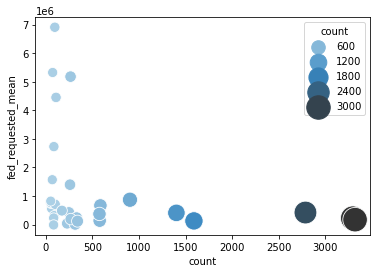

In [49]:
sns.scatterplot(
    data=prefix_subset, x="count", y="fed_requested_mean", hue="count", size="count", palette="Blues_d",
    sizes=(100, 600))

<AxesSubplot:xlabel='count', ylabel='ac_requested_mean'>

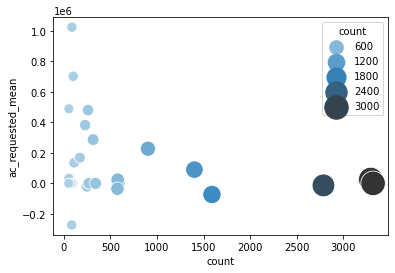

In [50]:
sns.scatterplot(
    data=prefix_subset, x="count", y="ac_requested_mean", hue="count", size="count", palette="Blues_d",
    sizes=(100, 600))

<AxesSubplot:xlabel='count', ylabel='total_requested_mean'>

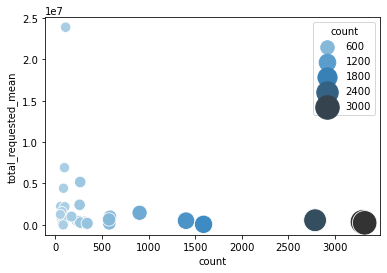

In [51]:
sns.scatterplot(
    data=prefix_subset, x="count", y="total_requested_mean", hue="count", size="count", palette="Blues_d",
    sizes=(100, 600))

<AxesSubplot:xlabel='count', ylabel='fed_requested_median'>

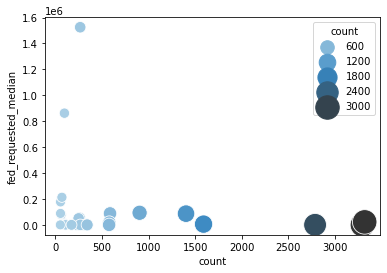

In [52]:
sns.scatterplot(
    data=prefix_subset, x="count", y="fed_requested_median", hue="count", size="count", palette="Blues_d",
    sizes=(100, 600))

<AxesSubplot:xlabel='count', ylabel='ac_requested_median'>

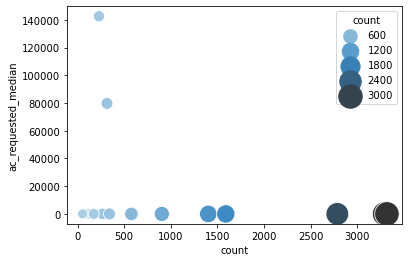

In [53]:
sns.scatterplot(
    data=prefix_subset, x="count", y="ac_requested_median", hue="count", size="count", palette="Blues_d",
    sizes=(100, 600))

<AxesSubplot:xlabel='count', ylabel='total_requested_median'>

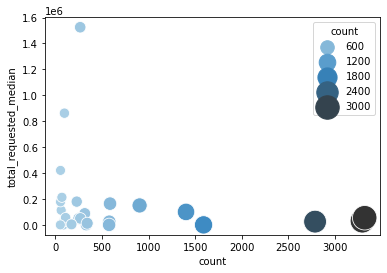

In [54]:
sns.scatterplot(
    data=prefix_subset, x="count", y="total_requested_median", hue="count", size="count", palette="Blues_d",
    sizes=(100, 600))

<AxesSubplot:xlabel='total_requested_mean', ylabel='count'>

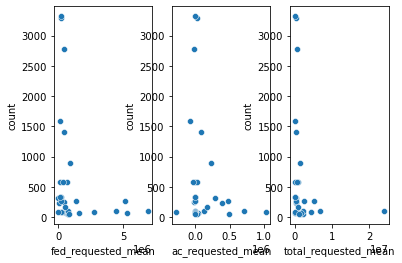

In [55]:
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(x='fed_requested_mean', y='count', data=prefix_subset, ax=axs[0])
sns.scatterplot(x='ac_requested_mean', y='count', data=prefix_subset, ax=axs[1])
sns.scatterplot(x='total_requested_mean',y='count', data=prefix_subset, ax=axs[2])

<AxesSubplot:xlabel='total_requested_median', ylabel='count'>

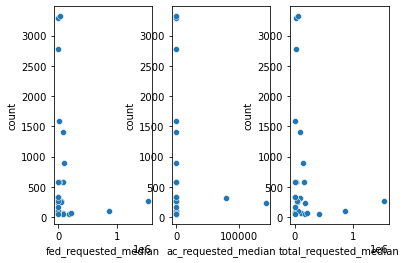

In [56]:
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(x='fed_requested_median', y='count', data=prefix_subset, ax=axs[0])
sns.scatterplot(x='ac_requested_median', y='count', data=prefix_subset, ax=axs[1])
sns.scatterplot(x='total_requested_median',y='count', data=prefix_subset, ax=axs[2])

#### Combined Scatter for Mean/Median and Count

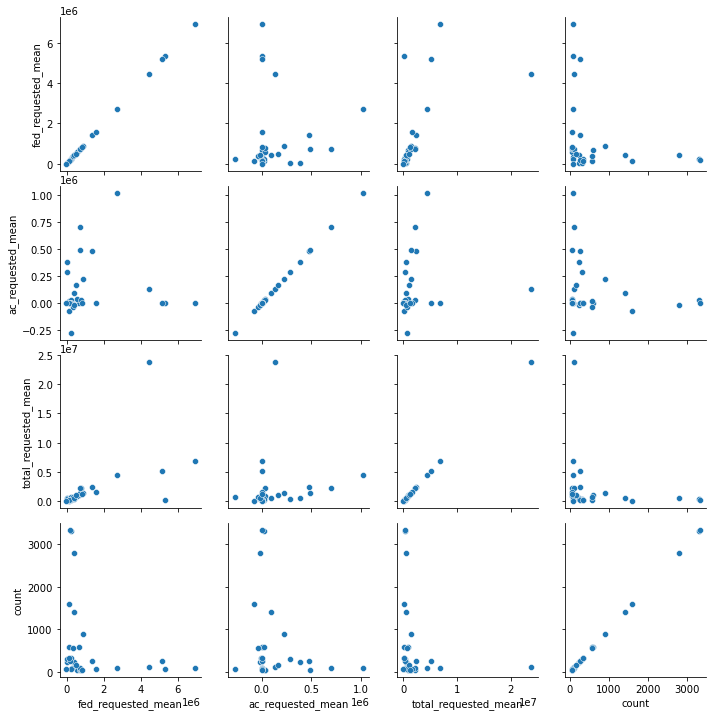

In [57]:
g = sns.PairGrid(prefix_subset, vars=["fed_requested_mean", "ac_requested_mean","total_requested_mean","count"])
g.map(sns.scatterplot)

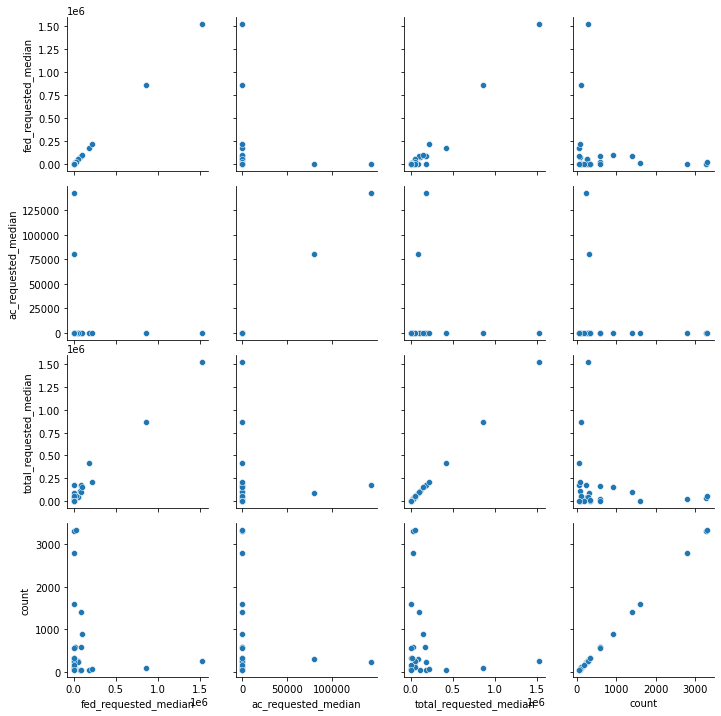

In [58]:
g = sns.PairGrid(prefix_subset, vars=["fed_requested_median", "ac_requested_median","total_requested_median","count"])
g.map(sns.scatterplot)

#### Barplots for Mean and Median

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='fed_requested_mean', ylabel='prefix'>

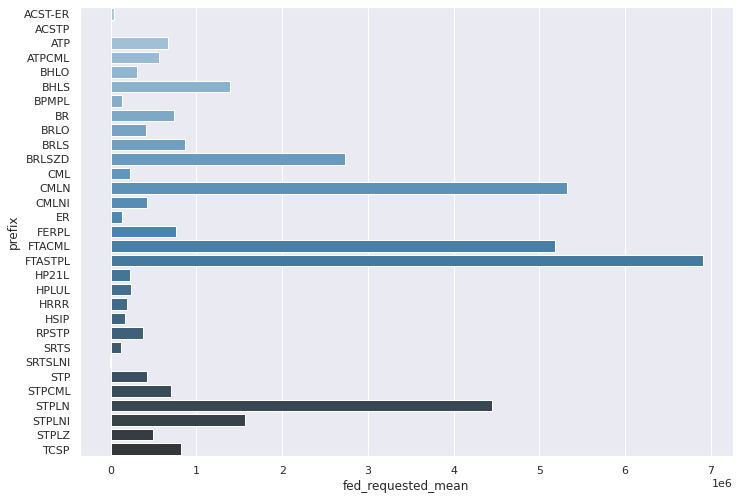

In [60]:
sns.barplot(x="fed_requested_mean", y="prefix", data=prefix_subset, palette="Blues_d")

<AxesSubplot:xlabel='ac_requested_mean', ylabel='prefix'>

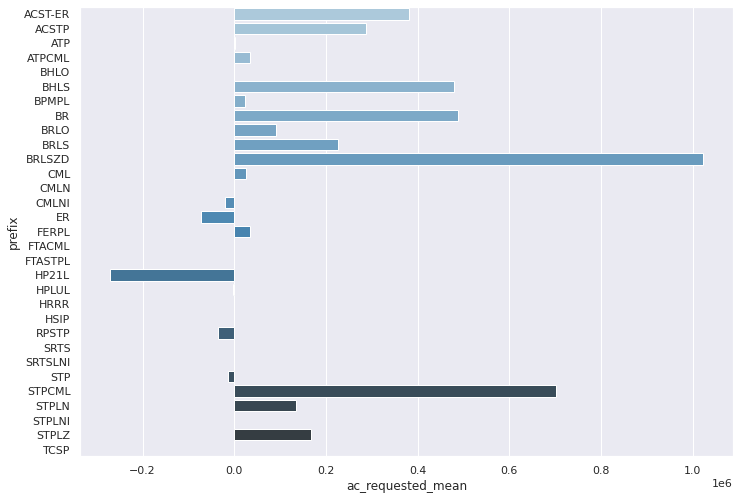

In [61]:
sns.barplot(x="ac_requested_mean", y="prefix", data=prefix_subset, palette="Blues_d")

<AxesSubplot:xlabel='total_requested_mean', ylabel='prefix'>

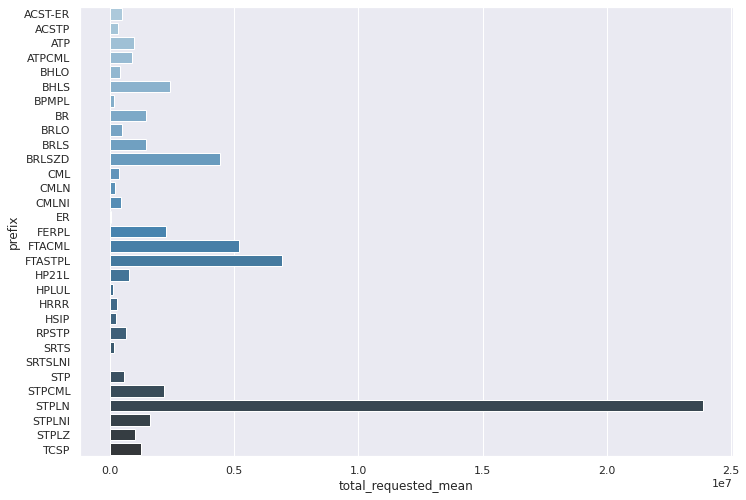

In [62]:
sns.barplot(x="total_requested_mean", y="prefix", data=prefix_subset, palette="Blues_d")

<AxesSubplot:xlabel='fed_requested_median', ylabel='prefix'>

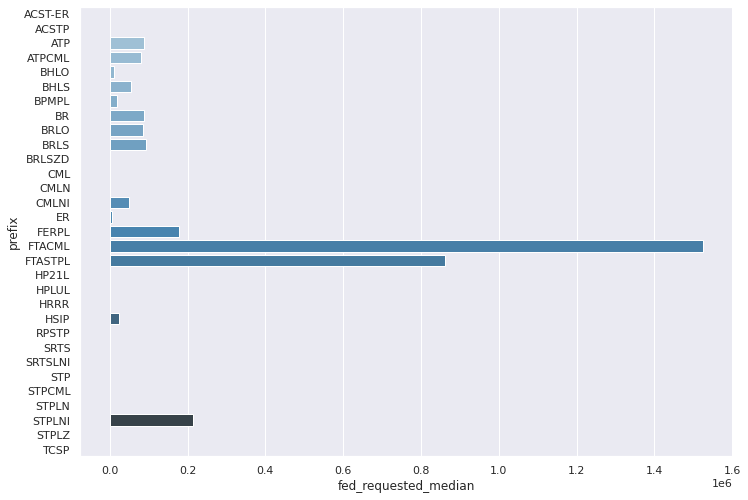

In [63]:
sns.barplot(x="fed_requested_median", y="prefix", data=prefix_subset, palette="Blues_d")

<AxesSubplot:xlabel='ac_requested_median', ylabel='prefix'>

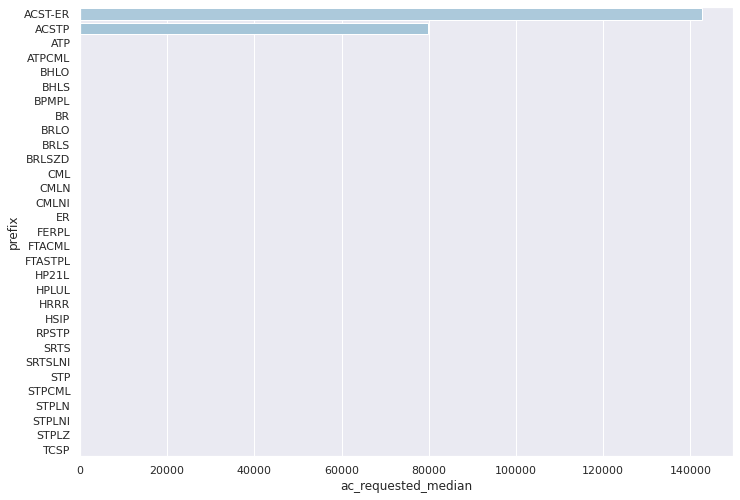

In [64]:
sns.barplot(x="ac_requested_median", y="prefix", data=prefix_subset, palette="Blues_d")

<AxesSubplot:xlabel='total_requested_median', ylabel='prefix'>

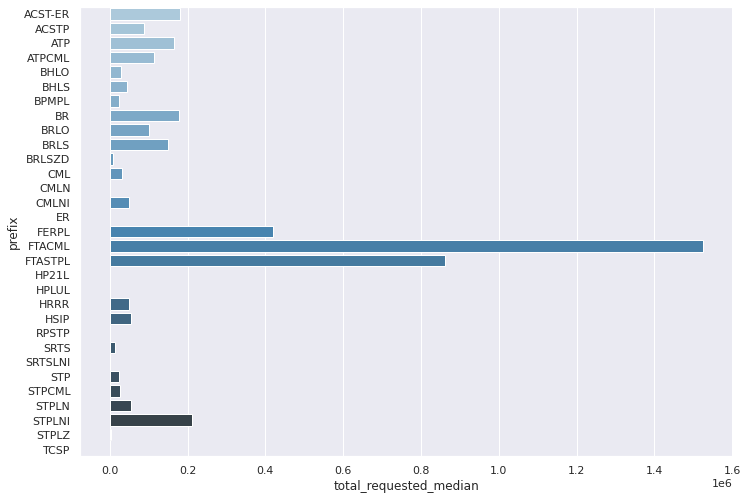

In [65]:
sns.barplot(x="total_requested_median", y="prefix", data=prefix_subset, palette="Blues_d")

## Looking at overall Agencies and MPOs

In [66]:
df.agency.value_counts()

Humboldt County                    627
Los Angeles                        534
Fresno                             459
Santa Cruz County                  443
Los Angeles County                 408
                                  ... 
Merced Co Aog                        1
Corning                              1
Napa County Office Of Education      1
Lgnw                                 1
Ala-Con Costa T                      1
Name: agency, Length: 671, dtype: int64

In [67]:
count_agency = pd.DataFrame(df.agency.value_counts())

In [68]:
count_agency.head()

,agency
Humboldt County,627
Los Angeles,534
Fresno,459
Santa Cruz County,443
Los Angeles County,408


Intersting that Humboldt has the highest count. Will investigate further in the **Identifying_Projects** Notebook

In [69]:
count_agency.tail()

,agency
Merced Co Aog,1
Corning,1
Napa County Office Of Education,1
Lgnw,1
Ala-Con Costa T,1


In [70]:
count_agency.agency.value_counts()

1      56
2      45
3      33
7      32
5      29
       ..
99      1
102     1
105     1
106     1
64      1
Name: agency, Length: 119, dtype: int64

Text(0, 0.5, 'Agencies')

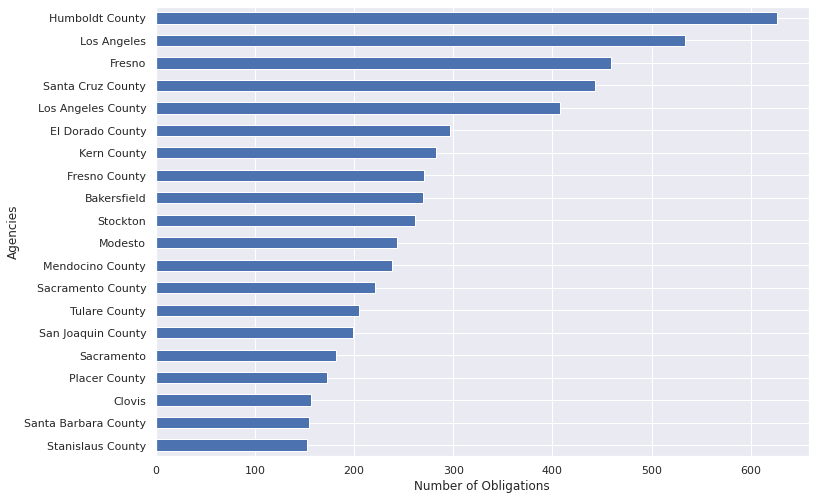

In [71]:
ax = df.agency.value_counts().iloc[:20].plot(kind="barh")
ax.invert_yaxis()
ax.set_xlabel('Number of Obligations')
ax.set_ylabel('Agencies')

In [72]:
source = df >> count(_.agency) >> arrange(-_.n) >> filter(_.n>=50)

In [73]:
bars = alt.Chart(source).mark_bar().encode(
    x=alt.X('n', axis=alt.Axis(title='Number of Obligations')),
    y=alt.Y('agency', axis=alt.Axis(title='Agency')
))


text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='n:Q'
)

    
(bars + text).properties(height=900)

alt.LayerChart(...)

In [74]:
df.mpo.value_counts()

SCAG       4988
MTC        3236
NON-MPO    2592
SACOG      1865
CFCG       1404
KCOG        998
STANCOG     759
AMBAG       745
SJCG        515
TCAG        489
SDAG        487
SBCG        340
MCAG        279
BCAG        255
SLAC        240
STPA        207
MCTC        194
KCAG        141
SANDAG      137
SJCOG       134
TMPO         47
COFCG        26
ER NONE      16
STACOG       10
FCOG          3
STNCOG        3
SLOCOG        2
SHASTA        1
MNOLTC        1
FSTIP         1
SANDA         1
Name: mpo, dtype: int64

Text(0, 0.5, 'MPOs')

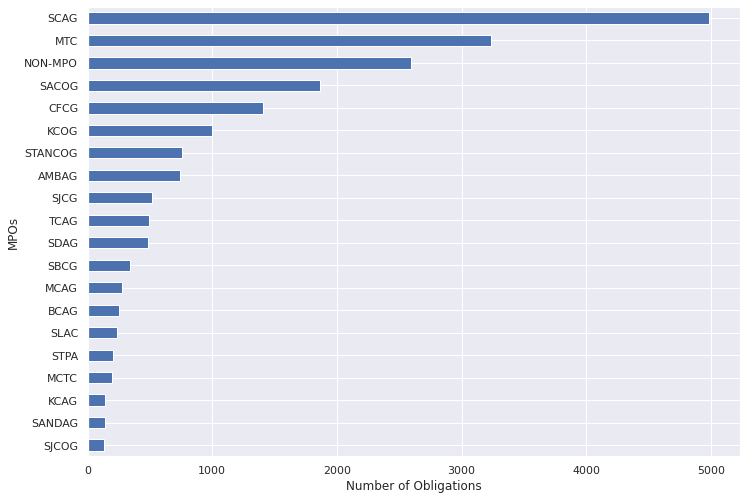

In [75]:
ax = df.mpo.value_counts().iloc[:20].plot(kind="barh")
ax.invert_yaxis()
ax.set_xlabel('Number of Obligations')
ax.set_ylabel('MPOs')

## Project Locations and Project Types

In [76]:
df>>count(_.type_of_work) >> arrange(-_.n)

,type_of_work,n
592,Bridge Replacement (tc),679
582,Bridge Replacement,519
2014,FTA Transfer,462
3979,Permanent Restoration,282
5289,Road Rehabilitation,269
...,...,...
6873,Work Occur In 2 Road Segments; 1st Segment Is ...,1
6874,Work Zone Data Exchange Demonstration Project....,1
6877,Yarts: Public Outreach And Marketing (yosemite...,1
6878,Years 2 To 5 Environmental Compliance (mitigat...,1


Text(0, 0.5, 'Type of Work')

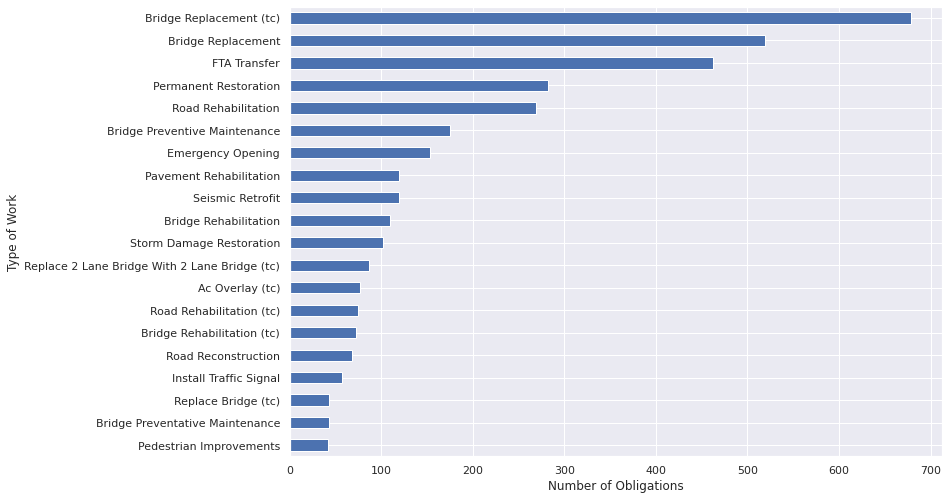

In [77]:
ax = df.type_of_work.value_counts().iloc[:20].plot(kind="barh")
ax.invert_yaxis()
ax.set_xlabel('Number of Obligations')
ax.set_ylabel('Type of Work')

In [78]:
df>>count(_.project_location) >> arrange(-_.n)

,project_location,n
6925,San Francisco Bay Area,65
8196,Various Locations,31
6846,Sacog Region,29
3028,Golden Gate Bridge,27
7864,Throughout Kern County,22
...,...,...
8901,Yucca Loma Road,1
8902,Yucca Loma Road Extension Over Mojave River,1
8904,Yucca Loma Road From Mohawk Road To Rancherias...,1
8912,Zediker Btwn 500' S/o To 750' N/o Manning; Es ...,1


## Looking at the Totals for each Prefix 

In [79]:
#trying something 

prefix_agency_count = df.groupby('prefix')[["agency"]].count().sort_values('agency', ascending=False)

In [80]:
prefix_agency_count['sum_total_obligations'] = df.groupby('prefix')[["total_requested"]].sum()

In [81]:
prefix_agency_count['sum_fed_obligations'] = df.groupby('prefix')[["fed_requested"]].sum()

In [82]:
prefix_agency_count['sum_ac_obligations'] = df.groupby('prefix')[["ac_requested"]].sum()

In [83]:
prefix_agency_count

,agency,sum_total_obligations,sum_fed_obligations,sum_ac_obligations
prefix,,,,
HSIP,3318,803403372.99,565243722.46,900180.00
CML,3293,1186670842.27,737761622.17,84595809.00
STP,2786,1551913727.10,1170677888.91,-36731820.00
ER,1590,102296855.88,202450854.82,-115662482.53
BRLO,1402,702151378.23,573293660.92,126309043.45
...,...,...,...,...
ESPLCM,1,2840093.10,0.00,0.00
ESPLEH,1,19913984.80,0.00,0.00
ESPLHP,1,-9782001.35,0.00,0.00


## Diving into indivudual Prefixes
### Looking at just HSIP
similar approach like the previous section 

In [84]:
df.head()

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
0,0,Obligated,BPMPL,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,5904,121,True
1,1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,32D0,8,False
2,2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,4820,4,False
3,3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,5924,244,True
4,4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,5924,214,True


In [85]:
hsip = df[(df['prefix']=='HSIP')]


In [86]:
hsip

,Unnamed: 0,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,warning,projectID,projectNO,compare_id_locode
11,11,Obligated,HSIP,5378(045),Palmdale,2018-12-11,2018-12-18,2018-12-27,2018-12-27,2018-12-27,545800.00,0.00,735764.00,Authorized,5378,7,E-76 approved on,8.00,9.00,0.00,SCAG015,Various Locations Citywide.,Upgrade Guard Rail And End Treatments,2,2018-12-04,2018-12-10,SCAG,NaN,5378,45,True
17,17,Obligated,HSIP,5385(060),Ridgecrest,2018-12-11,2018-12-18,2018-12-19,2018-12-20,2018-12-23,195500.00,0.00,195500.00,Authorized,5385,9,E-76 approved on,0.00,2.00,3.00,KER140601,Graaf Ave. At Alene Ave.; Drummond Ave. At San...,Install Rrfb's With Signage And Striping And U...,2,2018-12-11,2018-12-18,KCOG,NaN,5385,60,True
32,32,Obligated,HSIP,5385(059),Ridgecrest,2018-11-27,2018-12-18,2018-12-19,2018-12-20,2018-12-21,135200.00,0.00,135200.00,Authorized,5385,9,E-76 approved on,0.00,2.00,1.00,KER140601,Downs St. And Bowman Rd. Intersection,"Safety Signs, And Striping",2,2018-11-30,2018-12-18,KCOG,NaN,5385,59,True
39,39,Obligated,HSIP,5924(227),Sacramento County,2018-12-11,2018-12-13,2018-12-14,2018-12-18,2018-12-19,1413500.00,0.00,1413500.00,Authorized,5924,3,E-76 approved on,0.00,5.00,1.00,SAC25030,39 County Intersections On Portions Of Winding...,Upgrade Signals To Allow For Traffic Responsiv...,2,2018-12-07,2018-12-13,SACOG,NaN,5924,227,True
44,44,Obligated,HSIP,5108(178),Long Beach,2018-12-11,2018-12-11,2018-12-13,2018-12-14,2018-12-19,166500.00,0.00,366500.00,Authorized,5108,7,E-76 approved on,0.00,3.00,5.00,SCAG015,Anaheim Street: La River -pacific Coast Hwy,"Install Controller Access Medians, Signal Upgr...",1,2018-12-11,2018-12-11,SCAG,NaN,5108,178,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20100,20426,Obligated,HSIP,5066(027),National City,2021-10-01,2021-10-01,2021-10-01,2021-10-01,2021-10-15,0.00,0.00,0.00,Authorized,5066,11,E-76 approved on,8.00,0.00,14.00,CAL105/CAL334,"Highland Ave/ E 4th St, Highland Ave/shopping ...",Upgrade Traffic Signals; Install Protected Lef...,4,2021-09-23,2021-09-24,SDAG,NaN,5066,27,True
20101,20427,Obligated,HSIP,5066(029),National City,2021-10-01,2021-10-01,2021-10-01,2021-10-01,2021-10-15,0.00,0.00,0.00,Authorized,5066,11,E-76 approved on,8.00,0.00,14.00,CAL105 /,9 Intersections Throughout National City.,Install Pedestrian Crossings And Related Impro...,4,2021-09-23,2021-09-24,SDAG,NaN,5066,29,True
20108,20434,Obligated,HSIP,5073(086),Orange,2021-09-24,2021-09-24,2021-10-19,2021-10-19,2021-10-21,-646.92,0.00,1033.76,Authorized,5073,12,E-76 approved on,8.00,25.00,2.00,SCAG015,12 Various Signalized Intersections Located Th...,Upgrade The Accessible Pedestrian Signals (aps),4,2021-09-16,2021-09-17,SCAG,NaN,5073,86,True
20110,20436,Obligated,HSIP,5181(184),Huntington Beach,2021-10-18,2021-10-18,2021-10-18,2021-10-18,2021-10-22,-49587.18,0.00,-55004.80,Authorized,5181,12,E-76 approved on,4.00,0.00,4.00,SCAG015,Goldenwest Street From Warner Avenue To Heil A...,Install Signal Interconnect Conduit And Upgrad...,5,2021-10-14,2021-10-15,SCAG,NaN,5181,184,True


In [87]:
hsip[['dist_processing_days','hq_processing_days','fhwa_processing_days']].describe()

,dist_processing_days,hq_processing_days,fhwa_processing_days
count,3068.00,3290.00,3290.00
mean,22.19,8.59,5.93
std,52.51,13.44,4.76
min,-142.00,0.00,0.00
25%,0.00,0.00,2.00
50%,6.00,4.00,5.00
75%,19.00,11.00,8.00
max,1098.00,156.00,41.00


In [88]:
hsip.location.value_counts()

Obligated    3280
DISTRICT       26
FMIS            9
HQ              3
Name: location, dtype: int64

In [89]:
hsip.status_comment.value_counts()

Authorized                                                               3280
..                                                                         31
Hold for FTIP amendment.                                                    1
EXPIRED QAP                                                                 1
ON HOLD FOR DEOBLIGATION NOT PERMITTED AT THIS TIME                         1
ON HOLD FOR COST ESTIMATE CLARIFICATION & CE OVER 15% JUSTIFICATION         1
EPSP; JUSTIFICATION FOR PED EXTENSION FOR PE                                1
Hold verification of funding.                                               1
prog code Z300                                                              1
Name: status_comment, dtype: int64

#### By Agency

In [90]:
hsip.agency.value_counts()

Stockton              91
Los Angeles County    77
Los Angeles           75
Fresno                63
Orange                55
                      ..
Gardena                1
Rsm                    1
Daly City              1
Santa Clara            1
Caltrans               1
Name: agency, Length: 297, dtype: int64

In [91]:
hsip.agency.value_counts().mean()

11.171717171717171

In [92]:
hsip.agency.value_counts().describe()

count   297.00
mean     11.17
std      13.20
min       1.00
25%       3.00
50%       6.00
75%      13.00
max      91.00
Name: agency, dtype: float64

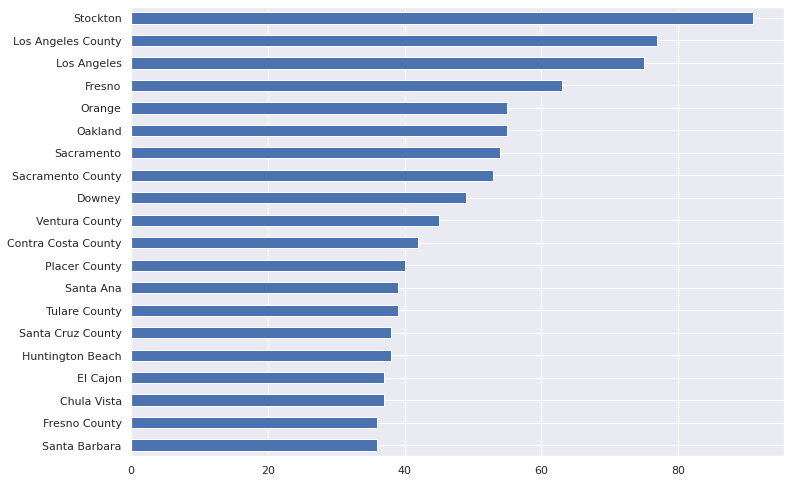

In [93]:
ax = hsip.agency.value_counts().iloc[:20].plot(kind="barh")
ax.invert_yaxis()

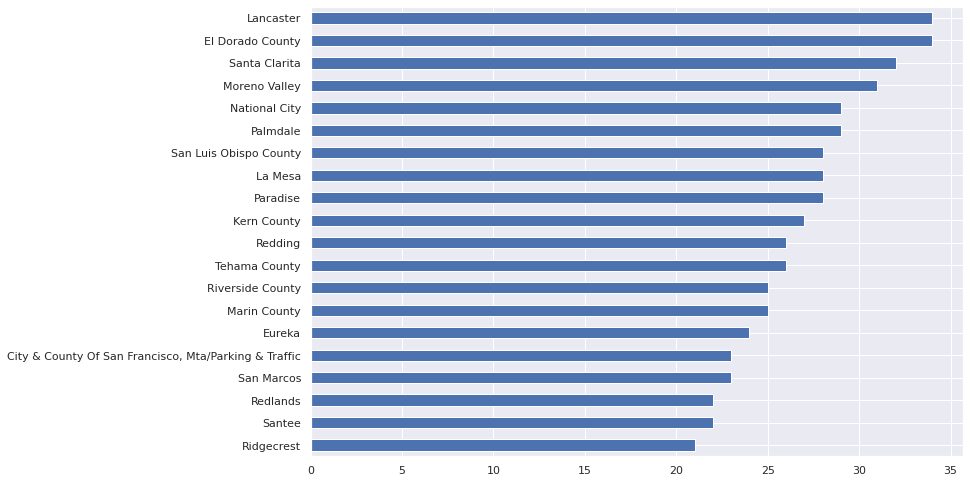

In [94]:
ax = hsip.agency.value_counts().iloc[20:40].plot(kind="barh")
ax.invert_yaxis()

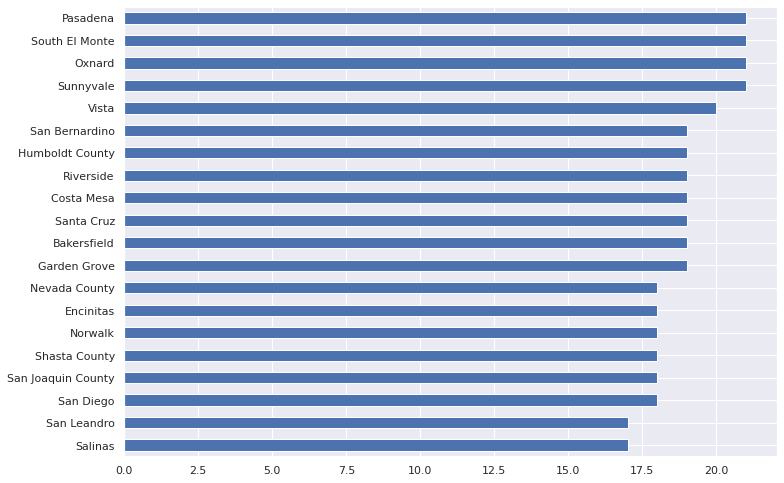

In [95]:
ax = hsip.agency.value_counts().iloc[40:60].plot(kind="barh")
ax.invert_yaxis()

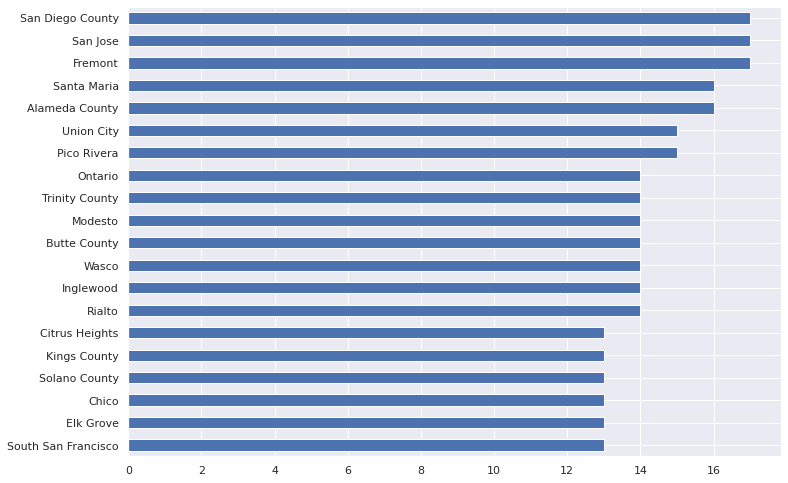

In [96]:
ax = hsip.agency.value_counts().iloc[60:80].plot(kind="barh")
ax.invert_yaxis()

#### By MPO

In [97]:
hsip.mpo.nunique()

25

In [98]:
hsip.mpo.value_counts()

SCAG       1255
MTC         453
SACOG       287
NON-MPO     219
SDAG        201
CFCG        136
KCOG        110
AMBAG       103
SJCG         97
TCAG         70
SBCG         68
STANCOG      59
BCAG         58
STPA         51
SLAC         39
MCAG         28
SJCOG        26
SANDAG       23
KCAG         14
MCTC         10
COFCG         5
ER NONE       2
SHASTA        1
STNCOG        1
TMPO          1
Name: mpo, dtype: int64

In [99]:
#makes sense given Los Angeles, Los Angeles County and Orange are in the top 5 when broken 
##down by agency



<AxesSubplot:>

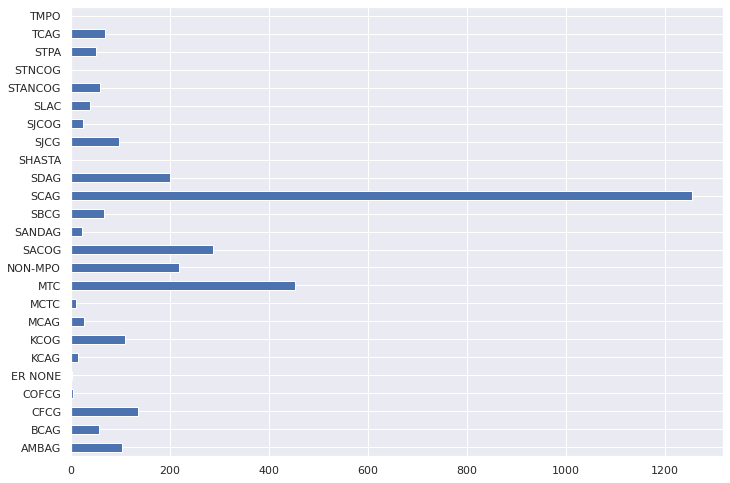

In [100]:
hsip.mpo.value_counts().sort_index(ascending=True).plot(kind="barh")

In [101]:
#mpo_bounds

In [102]:
#mpo_bounds2

#### Checking SEQ Column
Where the 

In [103]:
hsip.seq.value_counts().sort_index(ascending=True)

1    806
2    903
3    798
4    498
5    225
6     59
7     23
8      4
9      2
Name: seq, dtype: int64

<AxesSubplot:>

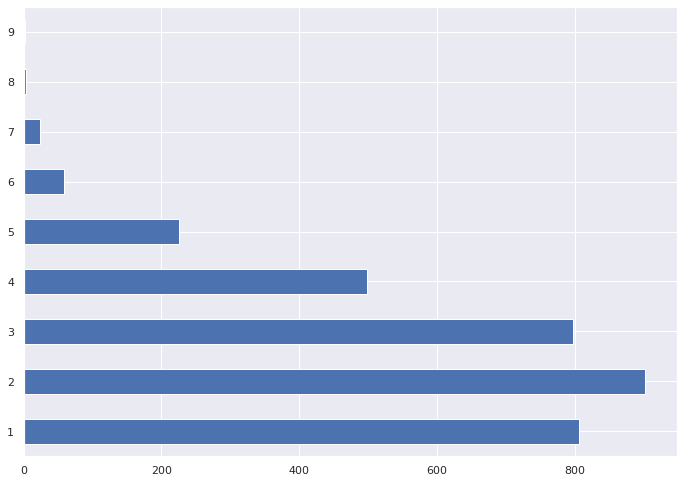

In [104]:
hsip.seq.value_counts().sort_index(ascending=True).plot(kind="barh")

In [105]:
hsip.groupby("seq")[["total_requested"]].describe()

total_requested                                                      \
              count      mean       std         min       25%       50%   
seq                                                                       
1            806.00 294816.40 649744.85     2300.00  51100.00 120430.00   
2            903.00 466488.29 736342.87 -2366000.00  15000.00 239000.00   
3            798.00 141781.04 544036.35 -2893110.00 -19830.64   3222.00   
4            498.00  34124.54 303042.13 -2069637.14 -26095.34      0.00   
5            225.00  44513.29 225276.18  -272965.59   -795.19      0.00   
6             59.00  74237.74 371454.40  -572440.41     -8.37      0.00   
7             23.00  -5314.01 175050.63  -708440.00   -987.63      0.00   
8              4.00  33460.57 144677.34  -103836.22 -25959.06      0.00   
9              2.00      0.00      0.00        0.00      0.00      0.00   

                          
          75%        max  
seq                       
1   274916.75 8670556.00  
2   667903.50 7449709.00  
3   145567.75 5293800.00  
4    31917.59 3594545.00  
5     7232.99 2105791.00  
6        0.00 2407071.38  
7     1763.63  301785.23  
8    59419.63  237678.52  
9        0.00       0.00